 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [54]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import csv
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [55]:
# Reading whale returns
whale_path = Path("/Users/moniqueferguson/Desktop/Miami/FinTech/MiamiHomework/Pandas_Homework/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [56]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [57]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [58]:
# Reading algorithmic returns
algo_path = Path("/Users/moniqueferguson/Desktop/Miami/FinTech/MiamiHomework/Pandas_Homework/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [59]:
# Count nulls
algo_df.isnull().sum
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [60]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [61]:
# Reading S&P 500 Closing Prices
sp500_path = Path("/Users/moniqueferguson/Desktop/Miami/FinTech/MiamiHomework/Pandas_Homework/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [62]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [63]:
# Remove $ from column
sp500_df["Close"]= sp500_df["Close"].str.replace("$", "", regex=True)
sp500_df["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [64]:
sp500_df.dtypes

Close    object
dtype: object

In [65]:
# Fix Data Types
sp500_df["Close"] = pd.to_numeric(sp500_df["Close"], errors="coerce")
sp500_df["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [66]:
# Check data type to ensure object to float
sp500_df.dtypes

Close    float64
dtype: object

In [67]:
# Calculate Daily Returns
sp500df_daily_returns = sp500_df.pct_change()
sp500df_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [68]:
# Count nulls
sp500df_daily_returns.isnull().sum()


Close    1
dtype: int64

In [69]:
# Drop nulls
sp500df_daily_returns.dropna(inplace=True)
sp500df_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [70]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["SP500"]
sp500df_daily_returns.columns = columns
sp500df_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [71]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_whale_algo_sp500 = pd.concat([whale_df, algo_df, sp500df_daily_returns], axis="columns", join="inner")
combined_whale_algo_sp500.sort_index
combined_whale_algo_sp500.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Daily Returns'}, xlabel='Date'>

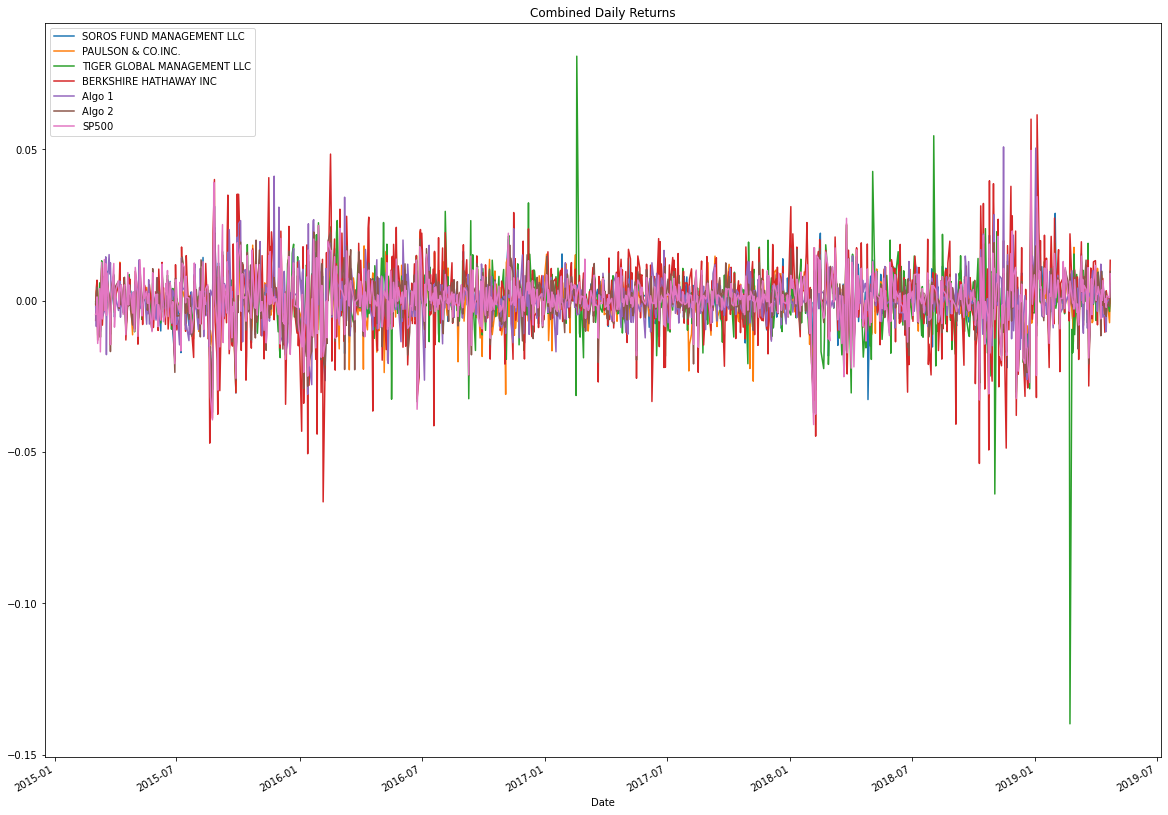

In [72]:
# Plot daily returns of all portfolios
all_portfolios_daily_returns = combined_whale_algo_sp500.plot(figsize=(20,15), title="Combined Daily Returns")
all_portfolios_daily_returns

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Combined Portfolios'}, xlabel='Date'>

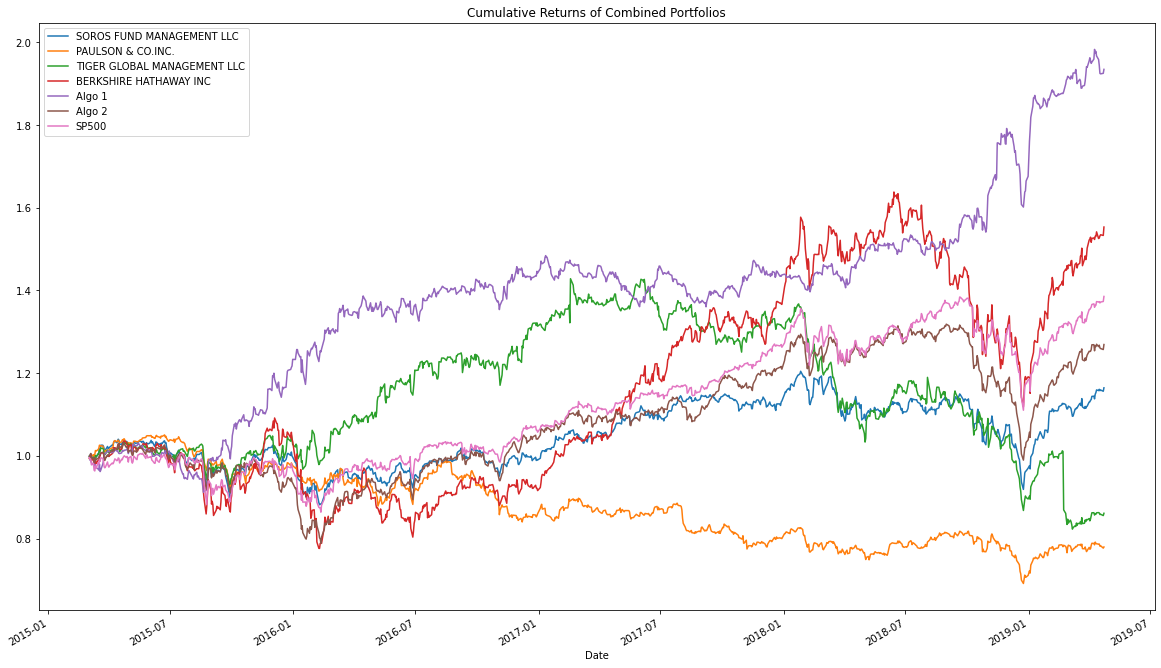

In [73]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_whale_algo_sp500).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,12), title="Cumulative Returns of Combined Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

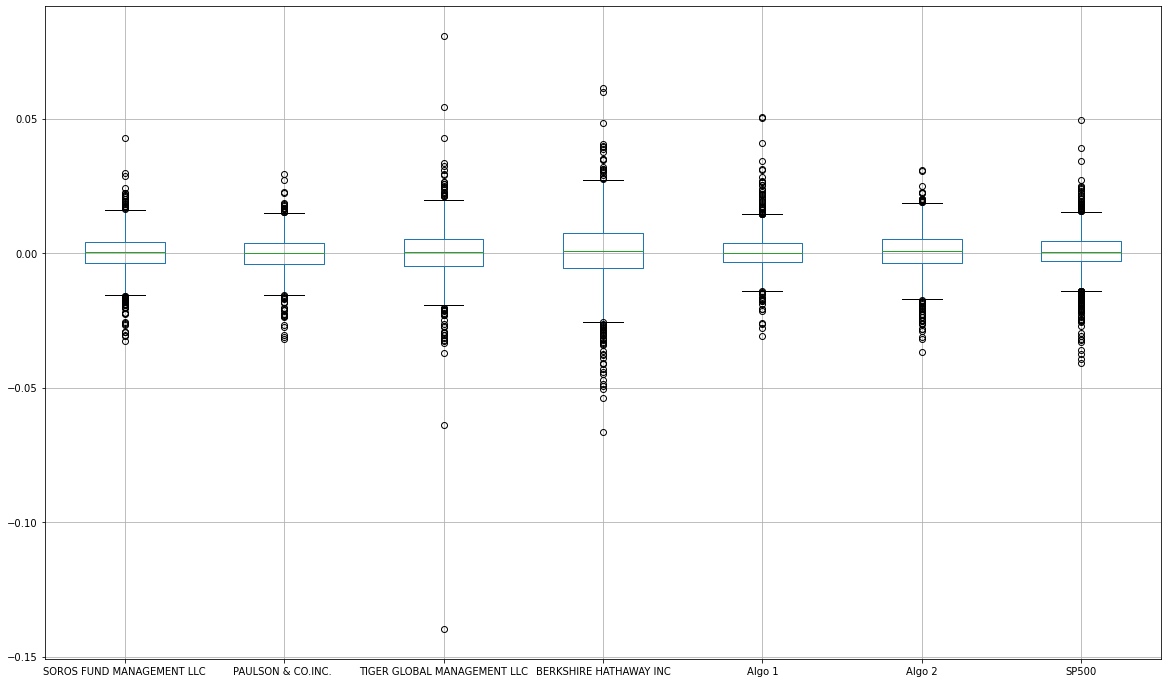

In [74]:
# Box plot to visually show risk
combined_whale_algo_sp500.boxplot(figsize=(20,12))

### Calculate Standard Deviations

In [75]:
# Calculate the daily standard deviations of all portfolios
combined_whale_algo_sp500.std

<bound method NDFrame._add_numeric_operations.<locals>.std of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                               

### Determine which portfolios are riskier than the S&P 500

In [76]:
# Calculate  the daily standard deviation of S&P 500
sp500df_daily_returns.std()


SP500    0.008111
dtype: float64

In [77]:
# Determine which portfolios are riskier than the S&P 500
volatility = combined_whale_algo_sp500.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

### Calculate the Annualized Standard Deviation

In [78]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_whale_algo_sp500.groupby(combined_whale_algo_sp500.index.year).std()
annualized_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015,0.007922,0.005959,0.008443,0.012681,0.008920,0.008651,0.009936
2016,0.007988,0.008246,0.010295,0.014039,0.008366,0.009676,0.008249
2017,0.004942,0.005935,0.008290,0.008566,0.005220,0.005431,0.004212
2018,0.009965,0.007484,0.012484,0.015265,0.007548,0.009056,0.010742
2019,0.007434,0.007104,0.018166,0.012797,0.007980,0.007811,0.007835


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

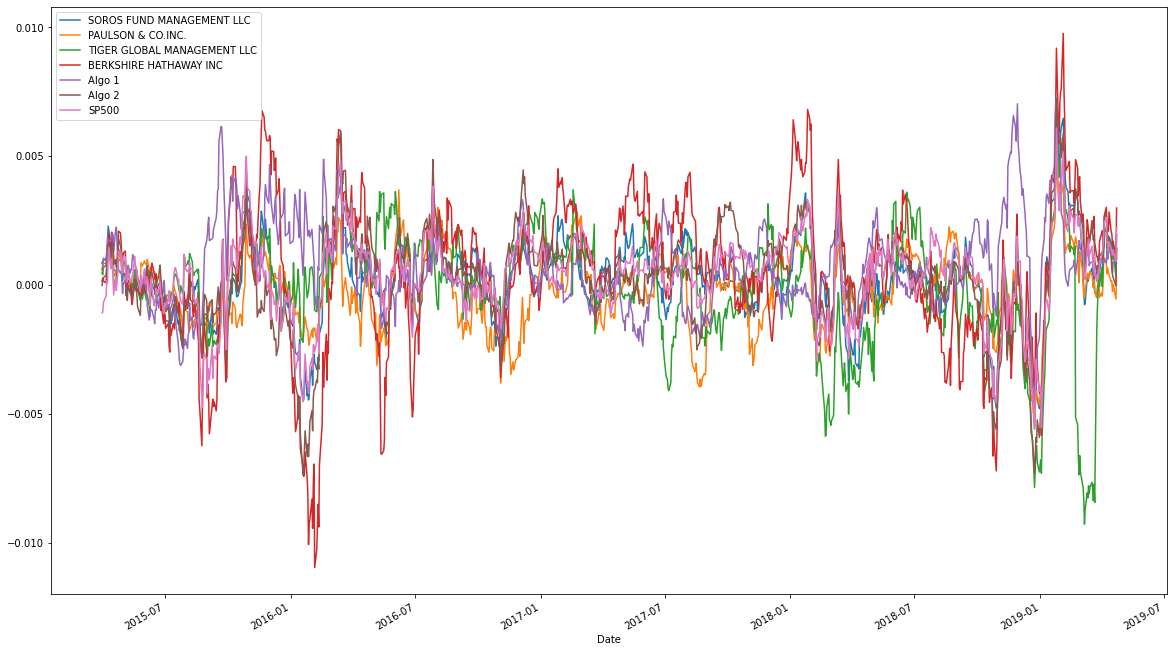

In [79]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined = combined_whale_algo_sp500.rolling(window=21).mean()

# Plot the rolling standard deviation
rolling_combined.plot(figsize=(20,12))

### Calculate and plot the correlation

<AxesSubplot:>

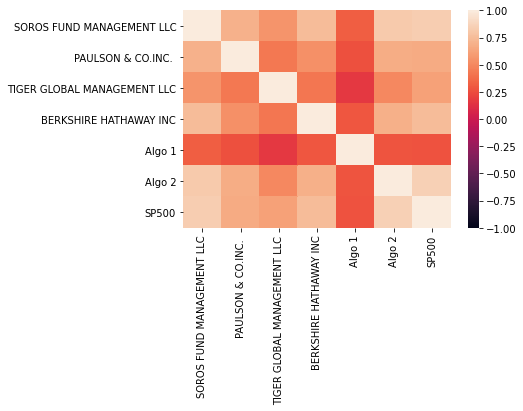

In [80]:
# Calculate the correlation
correlation = combined_whale_algo_sp500.corr()
correlation
# Display de correlation matrix
correlation_plot = sns.heatmap(correlation, vmin=-1, vmax=1)
correlation_plot

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [81]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [82]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [83]:
# Annualized Sharpe Ratios


In [84]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [85]:
# Reading data from 1st stock


In [86]:
# Reading data from 2nd stock


In [87]:
# Reading data from 3rd stock


In [88]:
# Combine all stocks in a single DataFrame


In [89]:
# Reset Date index


In [90]:
# Reorganize portfolio data by having a column per symbol


In [91]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [92]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [93]:
# Join your returns DataFrame to the original returns DataFrame


In [94]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [95]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [96]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [97]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [98]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [99]:
# Calculate Annualzied Sharpe Ratios


In [100]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!